In [139]:
%pylab inline
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc

from pyvirchow.segmentation import label_nuclei, summarize_region_properties
from pyvirchow.normalization import MacenkoNormalization
from pyvirchow.normalization import ReinhardNormalization
from pyvirchow.normalization import VahadaneNormalization
from pyvirchow.normalization import XuNormalization
from sklearn.metrics import accuracy_score

import pandas as pd
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=2)

sgd_pred = joblib.load('/Z/personal-folders/interns/saket/github/pyvirchow/scripts/sgd_val_pred.joblib.pickle')
sgd_prob = joblib.load('/Z/personal-folders/interns/saket/github/pyvirchow/scripts/sgd_val_prob.joblib.pickle')
sgd_true = joblib.load('/Z/personal-folders/interns/saket/github/pyvirchow/scripts/sgd_val_true.joblib.pickle')

validation_prob = joblib.load('/Z/personal-folders/interns/saket/github/pyvirchow/pickles/random_forest_valid_prob.joblib.pickle')
validation_true = joblib.load('/Z/personal-folders/interns/saket/github/pyvirchow/pickles/random_forest_valid_true.joblib.pickle')


#joblib.dump(validation_acc, '/Z/personal-folders/interns/saket/github/pyvirchow/pickles/random_forest_valid_acc.joblib.pickle')



Populating the interactive namespace from numpy and matplotlib


In [36]:
validation_pred = [1 if x>0.5 else 0 for x in validation_prob]

In [168]:
validation_prob[:6]

[0.118514374, 0.92861384, 0.30220687, 0.51794773, 0.70827943, 0.47581014]

In [169]:
validation_pred[:6]

[0, 1, 0, 1, 1, 0]

In [170]:
validation_samples.iloc[:6].is_tumor

49940    1
37700    0
38696    1
2073     0
6370     1
1451     0
Name: is_tumor, dtype: int32

In [171]:
np.array(validation_pred[:6]) - validation_true #validation_samples.iloc[:6].is_tumor 

49940   -1
37700    1
38696   -1
2073     1
6370     0
1451     0
Name: is_tumor, dtype: int64

In [22]:
average_precision = average_precision_score(sgd_true, sgd_prob)
precision, recall, _ = precision_recall_curve(sgd_true, sgd_prob)

In [25]:
average_precision_rf = average_precision_score(validation_true, validation_prob)
precision_rf, recall_rf, _ = precision_recall_curve(validation_true, validation_prob)

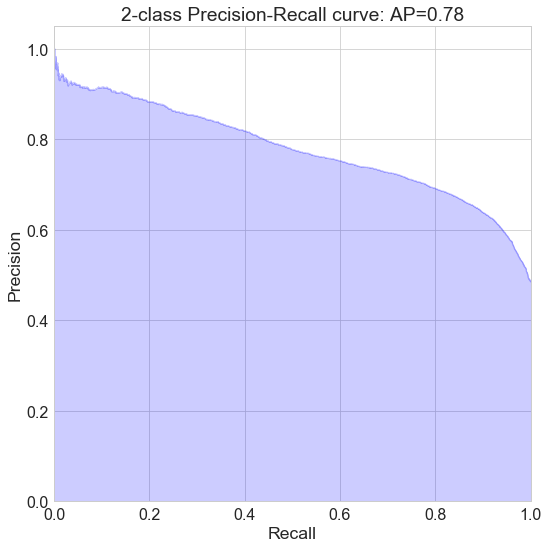

In [23]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.step(recall, precision, color='b', alpha=0.2,
         where='post')
ax.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_ylim([0.0, 1.05])
ax.set_xlim([0.0, 1.0])
ax.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
fig.tight_layout()
fig.savefig('presentation_images/8Conv_sgd_PRAUC.pdf')

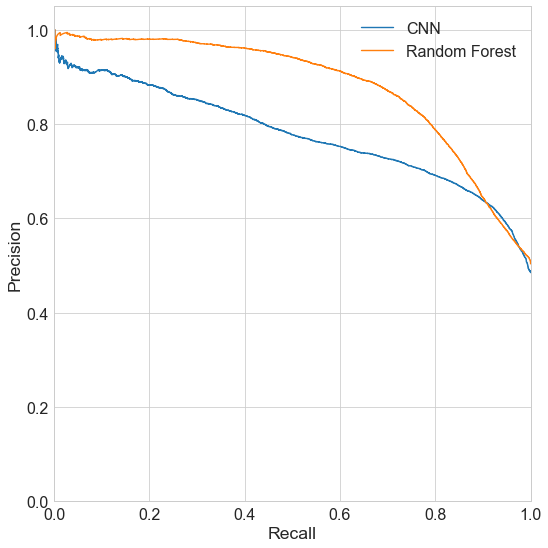

In [28]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.step(recall, precision, alpha=1,
         where='post', label='CNN')

ax.step(recall_rf, precision_rf, alpha=1,
         where='post', label='Random Forest')
ax.legend()
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_ylim([0.0, 1.05])
ax.set_xlim([0.0, 1.0])
#ax.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
#          average_precision))
fig.tight_layout()
fig.savefig('presentation_images/RF_vs_8Conv_sgd_PRAUC.pdf')

In [30]:
gbm_prob = joblib.load('../pickles/autoencoder_2k_gbm_y_valid_prob.joblib.pickle')
gbm_true = joblib.load('../pickles/autoencoder_2k_gbm_y_valid_label.joblib.pickle')
gbm_pred = joblib.load('../pickles/autoencoder_2k_gbm_y_valid_pred.joblib.pickle')

In [31]:
average_precision_gbm = average_precision_score(gbm_true, gbm_prob)
precision_gbm, recall_gbm, _ = precision_recall_curve(gbm_true, gbm_prob)

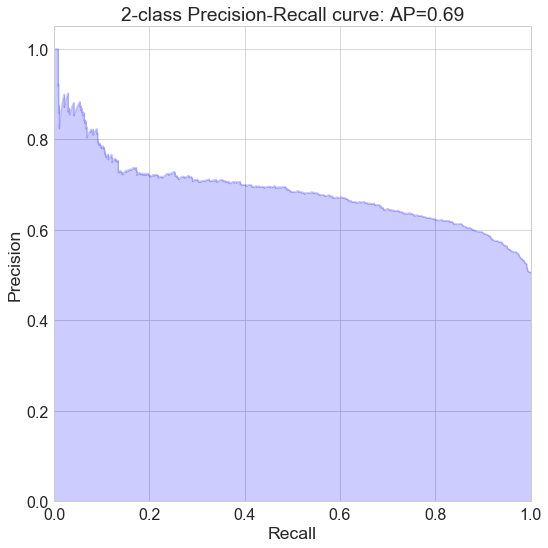

In [32]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.step(recall_gbm, precision_gbm, color='b', alpha=0.2,
         where='post')
ax.fill_between(recall_gbm, precision_gbm, step='post', alpha=0.2,
                 color='b')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_ylim([0.0, 1.05])
ax.set_xlim([0.0, 1.0])
ax.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_gbm))
fig.tight_layout()
fig.savefig('presentation_images/autoencoder_200k_nlatent100_PRAUC.pdf')

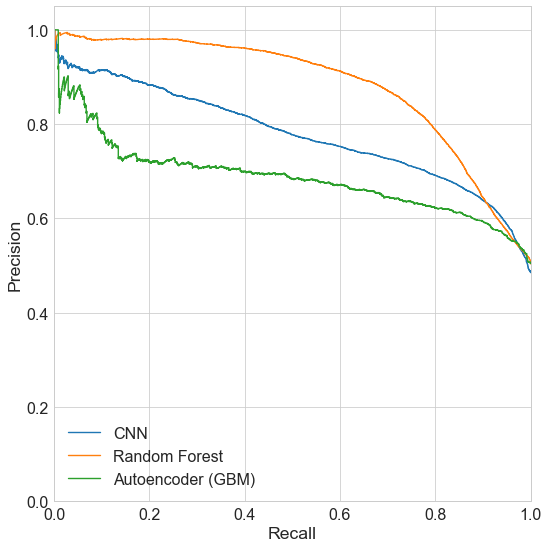

In [34]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.step(recall, precision, alpha=1,
         where='post', label='CNN')

ax.step(recall_rf, precision_rf, alpha=1,
         where='post', label='Random Forest')
ax.step(recall_gbm, precision_gbm, alpha=1,
         where='post', label='Autoencoder (GBM)')
ax.legend()
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_ylim([0.0, 1.05])
ax.set_xlim([0.0, 1.0])
#ax.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
#          average_precision))
fig.tight_layout()
fig.savefig('presentation_images/RF_vs_8Conv_vs_GBM_sgd_PRAUC.pdf')

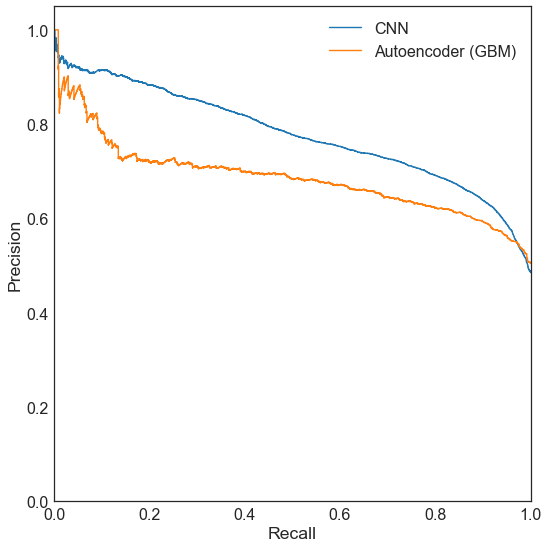

In [302]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.step(recall, precision, alpha=1,
         where='post', label='CNN')


ax.step(recall_gbm, precision_gbm, alpha=1,
         where='post', label='Autoencoder (GBM)')
ax.legend()
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_ylim([0.0, 1.05])
ax.set_xlim([0.0, 1.0])
#ax.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
#          average_precision))
fig.tight_layout()
fig.savefig('presentation_images/8Conv_vs_GBM_sgd_PRAUC.pdf')

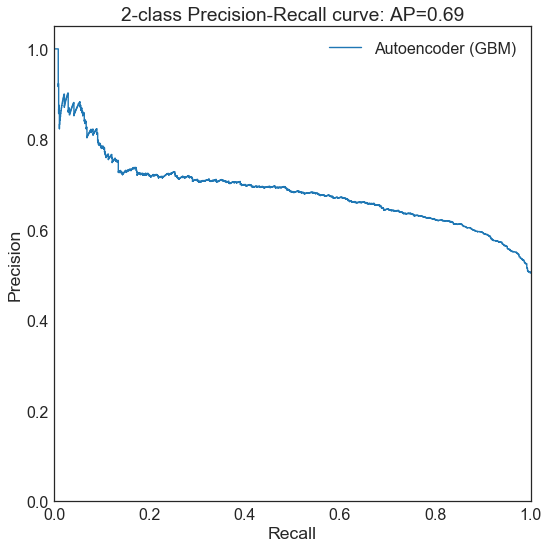

In [304]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.step(recall_gbm, precision_gbm, alpha=1,
         where='post', label='Autoencoder (GBM)')
ax.legend()
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_ylim([0.0, 1.05])
ax.set_xlim([0.0, 1.0])
ax.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_gbm))
fig.tight_layout()
fig.savefig('presentation_images/Autoencoder_GBM_PRAUC.pdf')

# Which samples are being missed by RF?

In [38]:
accuracy_score(validation_true, validation_pred)

0.8014410905550146

In [236]:
validation_diff = np.array(validation_true) - np.array(validation_pred)

tumor_called_as_normal = np.where(validation_diff == 1)[0]
normal_called_as_tumor = np.where(validation_diff == -1)[0]



In [44]:
tumor_called_as_normal

array([    5,     8,    13, ..., 25661, 25667, 25669])

In [45]:
normal_called_as_tumor

array([    3,     6,    19, ..., 25649, 25659, 25662])

In [46]:
len(normal_called_as_tumor)

2042

In [47]:
len(tumor_called_as_normal)

3056

In [48]:
len(validation_diff)

25675

In [166]:
len(validation_samples.index)

25675

In [163]:
validation_diff[:6]

array([ 0,  0,  0, -1,  0,  1])

In [164]:
validation_samples.iloc[:6].is_tumor - validation_pred[:6] 

49940    1
37700   -1
38696    1
2073    -1
6370     0
1451     0
Name: is_tumor, dtype: int64

In [162]:
validation_samples.iloc[:6]

,is_tumor,area,bbox_area,compactness,convex_area,eccentricity,equivalent_diameter,extent,fractal_dimension,inertia_tensor_eigvals_1,...,nuclei,nuclei_intensity_over_entire_image,orientation,perimeter,solidity,texture,total_nuclei_area,total_nuclei_area_ratio,img_path,mask_path
49940,1,235.000000,363.578125,18.904866,267.000000,0.705398,16.882823,0.652512,0.668686,30.564044,...,64.0,0.410586,0.282299,63.969915,0.877790,0.011961,15040.0,0.229492,/Z/personal-folders/interns/saket/github/pyvirchow...,/Z/personal-folders/interns/saket/github/pyvirchow...
37700,0,256.242424,445.272727,24.212085,313.727273,0.785094,16.933430,0.558034,0.792984,37.943163,...,33.0,0.612549,0.353994,72.614406,0.796861,0.058307,8456.0,0.129028,/Z/personal-folders/interns/saket/github/pyvirchow...,/Z/personal-folders/interns/saket/github/pyvirchow...
38696,1,266.206897,489.706897,26.278800,337.913793,0.748037,17.476169,0.539692,0.731610,39.592891,...,58.0,0.688930,0.249926,77.562935,0.774670,0.080577,15440.0,0.235596,/Z/personal-folders/interns/saket/github/pyvirchow...,/Z/personal-folders/interns/saket/github/pyvirchow...
2073,0,280.393443,461.967213,22.757203,334.426230,0.689735,18.375253,0.610065,0.763239,37.107887,...,61.0,0.514008,0.014551,75.783399,0.830354,0.011731,17104.0,0.260986,/Z/personal-folders/interns/saket/github/pyvirchow...,/Z/personal-folders/interns/saket/github/pyvirchow...
6370,1,248.782609,489.195652,26.689699,323.130435,0.786183,16.938261,0.517756,0.785652,41.888548,...,46.0,0.674970,0.058604,76.282287,0.768307,0.052509,11444.0,0.174622,/Z/personal-folders/interns/saket/github/pyvirchow...,/Z/personal-folders/interns/saket/github/pyvirchow...
1451,0,263.151515,390.939394,17.832615,289.575758,0.664145,17.962194,0.675962,0.673228,33.138650,...,33.0,0.456289,0.244651,66.619051,0.906479,0.025923,8684.0,0.132507,/Z/personal-folders/interns/saket/github/pyvirchow...,/Z/personal-folders/interns/saket/github/pyvirchow...


In [173]:
train_samples = pd.read_table('/Z/personal-folders/interns/saket/github/pyvirchow/data/patch_df/train_df_segmented_with_labels_subsampled.tsv')
validation_samples = pd.read_table('/Z/personal-folders/interns/saket/github/pyvirchow/data/patch_df/validate_df_segmented_with_labels_subsampled.tsv')
validation_samples.head()

,is_tumor,area,bbox_area,compactness,convex_area,eccentricity,equivalent_diameter,extent,fractal_dimension,inertia_tensor_eigvals_1,...,moments_hu_6,moments_hu_7,nuclei,nuclei_intensity_over_entire_image,orientation,perimeter,solidity,texture,total_nuclei_area,total_nuclei_area_ratio
0,1,235.000000,363.578125,18.904866,267.000000,0.705398,16.882823,0.652512,0.668686,30.564044,...,0.000037,2.270472e-08,64.0,0.410586,0.282299,63.969915,0.877790,0.011961,15040.0,0.229492
1,0,256.242424,445.272727,24.212085,313.727273,0.785094,16.933430,0.558034,0.792984,37.943163,...,0.000062,-1.667617e-07,33.0,0.612549,0.353994,72.614406,0.796861,0.058307,8456.0,0.129028
2,1,266.206897,489.706897,26.278800,337.913793,0.748037,17.476169,0.539692,0.731610,39.592891,...,0.000106,3.592234e-06,58.0,0.688930,0.249926,77.562935,0.774670,0.080577,15440.0,0.235596
3,0,280.393443,461.967213,22.757203,334.426230,0.689735,18.375253,0.610065,0.763239,37.107887,...,0.000027,7.866641e-08,61.0,0.514008,0.014551,75.783399,0.830354,0.011731,17104.0,0.260986
4,1,248.782609,489.195652,26.689699,323.130435,0.786183,16.938261,0.517756,0.785652,41.888548,...,0.000118,2.072003e-06,46.0,0.674970,0.058604,76.282287,0.768307,0.052509,11444.0,0.174622


In [54]:
def order(frame,var):
    if type(var) is str:
        var = [var] #let the command take a string or list
    varlist =[w for w in frame.columns if w not in var]
    frame = frame[var+varlist]
    return frame 

In [257]:
validation_samples = pd.read_table('/Z/personal-folders/interns/saket/github/pyvirchow/data/patch_df/validate_df_segmented_with_labels.tsv')
validation_samples.head()


,is_tumor,area,bbox_area,compactness,convex_area,eccentricity,equivalent_diameter,extent,fractal_dimension,inertia_tensor_eigvals_1,...,moments_hu_6,moments_hu_7,nuclei,nuclei_intensity_over_entire_image,orientation,perimeter,solidity,texture,total_nuclei_area,total_nuclei_area_ratio
0,1,250.000000,438.102564,23.709287,304.948718,0.720439,17.149201,0.579958,0.822024,36.704699,...,0.000026,-5.760912e-09,39.0,0.589500,0.273202,72.657252,0.818074,0.036456,9750.0,0.148773
1,1,207.490196,320.960784,19.011416,237.882353,0.634987,15.949753,0.651405,0.826112,25.565179,...,0.000015,3.745444e-08,51.0,0.385018,-0.014137,60.665280,0.869844,0.015241,10582.0,0.161469
2,0,183.881579,281.000000,18.217954,207.828947,0.630026,15.107209,0.658975,0.874066,21.641277,...,0.000010,-2.752486e-07,76.0,0.405849,0.265983,56.269617,0.883679,0.013554,13975.0,0.213242
3,0,318.000000,695.166667,27.739546,393.500000,0.786832,18.449680,0.483102,0.873087,65.628805,...,0.000811,6.339253e-07,18.0,0.726066,-0.570743,84.742651,0.791796,0.114377,5724.0,0.087341
4,1,248.685185,479.129630,27.947824,333.592593,0.730926,17.005840,0.525764,0.819536,38.398686,...,0.000379,-1.105410e-06,54.0,0.595760,0.268753,78.615576,0.738410,0.025264,13429.0,0.204910


In [258]:
validation_samples_labels = pd.read_table(
    '/Z/personal-folders/interns/saket/github/pyvirchow/data/patch_df/validate_df_with_mask.tsv'
)
validation_samples_labels.head()

,is_tissue,is_tumor,json_filepath,slide_path,slide_type,tile_loc,uid,img_path,mask_path
0,True,True,/Z/personal-folders/interns/saket/histopath_da...,/Z/personal-folders/interns/saket/histopath_da...,tumor,"(377, 175)",tumor_046,/Z/personal-folders/interns/saket/github/pyvirchow...,/Z/personal-folders/interns/saket/github/pyvirchow...
1,True,True,/Z/personal-folders/interns/saket/histopath_da...,/Z/personal-folders/interns/saket/histopath_da...,tumor,"(443, 276)",tumor_011,/Z/personal-folders/interns/saket/github/pyvirchow...,/Z/personal-folders/interns/saket/github/pyvirchow...
2,True,False,NaN,/Z/personal-folders/interns/saket/histopath_da...,normal,"(457, 171)",normal_030,/Z/personal-folders/interns/saket/github/pyvirchow...,/Z/personal-folders/interns/saket/github/pyvirchow...
3,True,True,/Z/personal-folders/interns/saket/histopath_da...,/Z/personal-folders/interns/saket/histopath_da...,tumor,"(294, 242)",tumor_046,/Z/personal-folders/interns/saket/github/pyvirchow...,/Z/personal-folders/interns/saket/github/pyvirchow...
4,True,False,NaN,/Z/personal-folders/interns/saket/histopath_da...,normal,"(143, 282)",normal_159,/Z/personal-folders/interns/saket/github/pyvirchow...,/Z/personal-folders/interns/saket/github/pyvirchow...


In [285]:
validation_samples = pd.read_table('/Z/personal-folders/interns/saket/github/pyvirchow/data/patch_df/validate_df_segmented_with_labels.tsv')
validation_samples_labels = pd.read_table(
    '/Z/personal-folders/interns/saket/github/pyvirchow/data/patch_df/validate_df_with_mask.tsv'
)


validation_samples_tumor = validation_samples[validation_samples.is_tumor==1].sample(frac=0.45, random_state=42)
validation_samples_normal = validation_samples[validation_samples.is_tumor==0].sample(frac=0.45, random_state=43)

validation_samples_labels_tumor = validation_samples_labels[validation_samples_labels.is_tumor==1].sample(frac=0.45, random_state=42)
validation_samples_labels_normal = validation_samples_labels[validation_samples_labels.is_tumor==0].sample(frac=0.45, random_state=43)


validation_samples = pd.concat([validation_samples_tumor, validation_samples_normal]).sample(frac=1, random_state=43)
validation_samples_labels = pd.concat([validation_samples_labels_tumor, validation_samples_labels_normal]).sample(frac=1, random_state=43)

#validation_samples['img_path'] = ''
#validation_samples['mask_path'] = ''
validation_samples['img_path'] = validation_samples_labels.img_path.tolist()
validation_samples['is_tissue'] = validation_samples_labels.is_tissue.tolist()
validation_samples['uid'] = validation_samples_labels.uid.tolist()

validation_samples['mask_path'] = validation_samples_labels.mask_path.tolist()
validation_samples.loc[validation_samples.img_path!=validation_samples.img_path, 'img_path'] = 'xxx'
validation_samples.loc[validation_samples.mask_path!=validation_samples.mask_path, 'mask_path'] = 'yyy'
validation_samples = validation_samples.dropna()
validation_samples = validation_samples.reset_index(drop=True)

In [286]:
validation_samples.head()

,is_tumor,area,bbox_area,compactness,convex_area,eccentricity,equivalent_diameter,extent,fractal_dimension,inertia_tensor_eigvals_1,...,orientation,perimeter,solidity,texture,total_nuclei_area,total_nuclei_area_ratio,img_path,is_tissue,uid,mask_path
0,1,235.000000,363.578125,18.904866,267.000000,0.705398,16.882823,0.652512,0.668686,30.564044,...,0.282299,63.969915,0.877790,0.011961,15040.0,0.229492,/Z/personal-folders/interns/saket/github/pyvirchow...,True,tumor_046,/Z/personal-folders/interns/saket/github/pyvirchow...
1,0,256.242424,445.272727,24.212085,313.727273,0.785094,16.933430,0.558034,0.792984,37.943163,...,0.353994,72.614406,0.796861,0.058307,8456.0,0.129028,/Z/personal-folders/interns/saket/github/pyvirchow...,True,normal_092,/Z/personal-folders/interns/saket/github/pyvirchow...
2,1,266.206897,489.706897,26.278800,337.913793,0.748037,17.476169,0.539692,0.731610,39.592891,...,0.249926,77.562935,0.774670,0.080577,15440.0,0.235596,/Z/personal-folders/interns/saket/github/pyvirchow...,True,tumor_046,/Z/personal-folders/interns/saket/github/pyvirchow...
3,0,280.393443,461.967213,22.757203,334.426230,0.689735,18.375253,0.610065,0.763239,37.107887,...,0.014551,75.783399,0.830354,0.011731,17104.0,0.260986,/Z/personal-folders/interns/saket/github/pyvirchow...,True,tumor_069,/Z/personal-folders/interns/saket/github/pyvirchow...
4,1,248.782609,489.195652,26.689699,323.130435,0.786183,16.938261,0.517756,0.785652,41.888548,...,0.058604,76.282287,0.768307,0.052509,11444.0,0.174622,/Z/personal-folders/interns/saket/github/pyvirchow...,True,tumor_046,/Z/personal-folders/interns/saket/github/pyvirchow...


In [305]:
validation_pred_examples = pd.read_table('/Z/personal-folders/interns/saket/github/pyvirchow/data/patch_df/validate_df_segmented_with_labels_subsampled_v1_predicted.tsv')
len(validation_pred_examples.index)
                                         

25675

In [308]:
validation_pred_examples['true_vs_pred'] = (validation_pred_examples.is_tumor-validation_pred_examples.pred_label).tolist()


In [306]:
accuracy_score(validation_pred_examples.is_tumor, validation_pred_examples.pred_label)

0.8003894839337877

In [316]:
normal_called_as_tumor = validation_pred_examples[validation_pred_examples.true_vs_pred==-1] 
tumor_called_as_normal = validation_pred_examples[validation_pred_examples.true_vs_pred==1] 

In [317]:
tumor_called_as_normal = tumor_called_as_normal.reset_index(drop=True)
normal_called_as_tumor = normal_called_as_tumor.reset_index(drop=True)

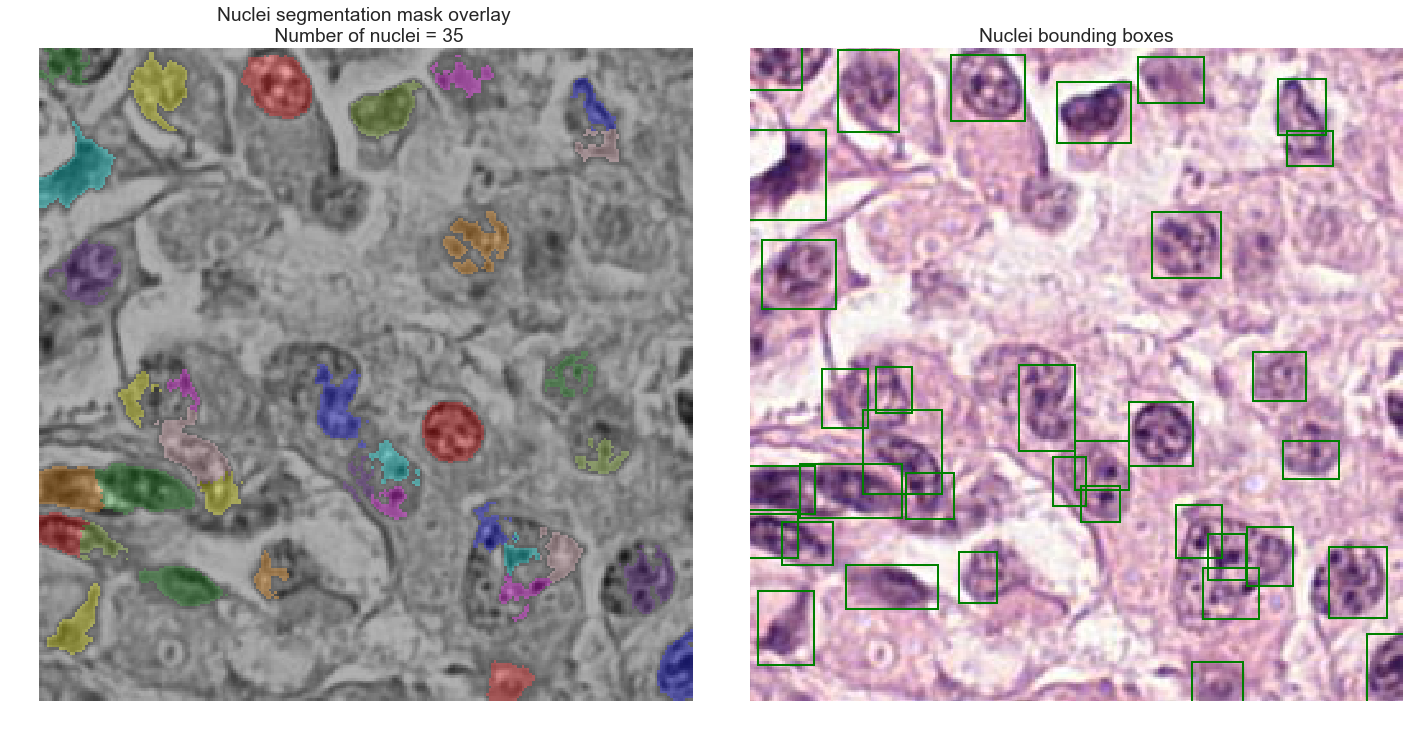

In [322]:
#index = tumor_called_as_normal[0]
index = 0
sns.set_style('white')
img = joblib.load(tumor_called_as_normal.iloc[index].img_path)
mask = joblib.load(tumor_called_as_normal.iloc[index].mask_path)
#plt.imshow(img)

vahadane_fit = VahadaneNormalization()
vahadane_fit.fit(np.asarray(img).astype(np.uint8))

H_channel_v = vahadane_fit.get_hematoxylin_channel(img)
E_channel_v = vahadane_fit.get_eosin_channel(img)

#_, _ = label_nuclei(H_channel_v/255)
_, _ = label_nuclei(img)
plt.savefig('presentation_images/rf_tumor_called_as_normal_{}.pdf'.format(index))

In [319]:
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

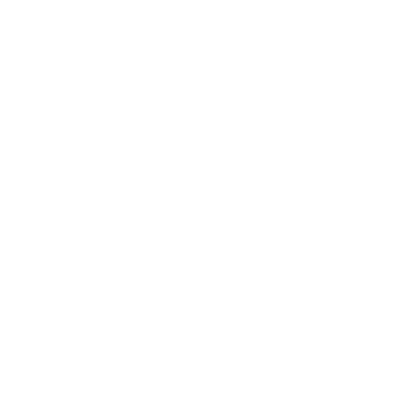

In [323]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
ax.imshow(mask, cmap='gray', vmin=0, vmax=1)
ax.axis('off')
fig.savefig('presentation_images/rf_tumor_called_as_normal_mask_{}.pdf'.format(index))

In [301]:
validation_samples['pred'] = validation_pred
validation_samples['true'] = validation_true
validation_samples.head()

,is_tumor,area,bbox_area,compactness,convex_area,eccentricity,equivalent_diameter,extent,fractal_dimension,inertia_tensor_eigvals_1,...,solidity,texture,total_nuclei_area,total_nuclei_area_ratio,img_path,is_tissue,uid,mask_path,pred,true
0,1,235.000000,363.578125,18.904866,267.000000,0.705398,16.882823,0.652512,0.668686,30.564044,...,0.877790,0.011961,15040.0,0.229492,/Z/personal-folders/interns/saket/github/pyvirchow...,True,tumor_046,/Z/personal-folders/interns/saket/github/pyvirchow...,0,0
1,0,256.242424,445.272727,24.212085,313.727273,0.785094,16.933430,0.558034,0.792984,37.943163,...,0.796861,0.058307,8456.0,0.129028,/Z/personal-folders/interns/saket/github/pyvirchow...,True,normal_092,/Z/personal-folders/interns/saket/github/pyvirchow...,1,1
2,1,266.206897,489.706897,26.278800,337.913793,0.748037,17.476169,0.539692,0.731610,39.592891,...,0.774670,0.080577,15440.0,0.235596,/Z/personal-folders/interns/saket/github/pyvirchow...,True,tumor_046,/Z/personal-folders/interns/saket/github/pyvirchow...,0,0
3,0,280.393443,461.967213,22.757203,334.426230,0.689735,18.375253,0.610065,0.763239,37.107887,...,0.830354,0.011731,17104.0,0.260986,/Z/personal-folders/interns/saket/github/pyvirchow...,True,tumor_069,/Z/personal-folders/interns/saket/github/pyvirchow...,1,0
4,1,248.782609,489.195652,26.689699,323.130435,0.786183,16.938261,0.517756,0.785652,41.888548,...,0.768307,0.052509,11444.0,0.174622,/Z/personal-folders/interns/saket/github/pyvirchow...,True,tumor_046,/Z/personal-folders/interns/saket/github/pyvirchow...,1,1


In [ ]:
tumor_

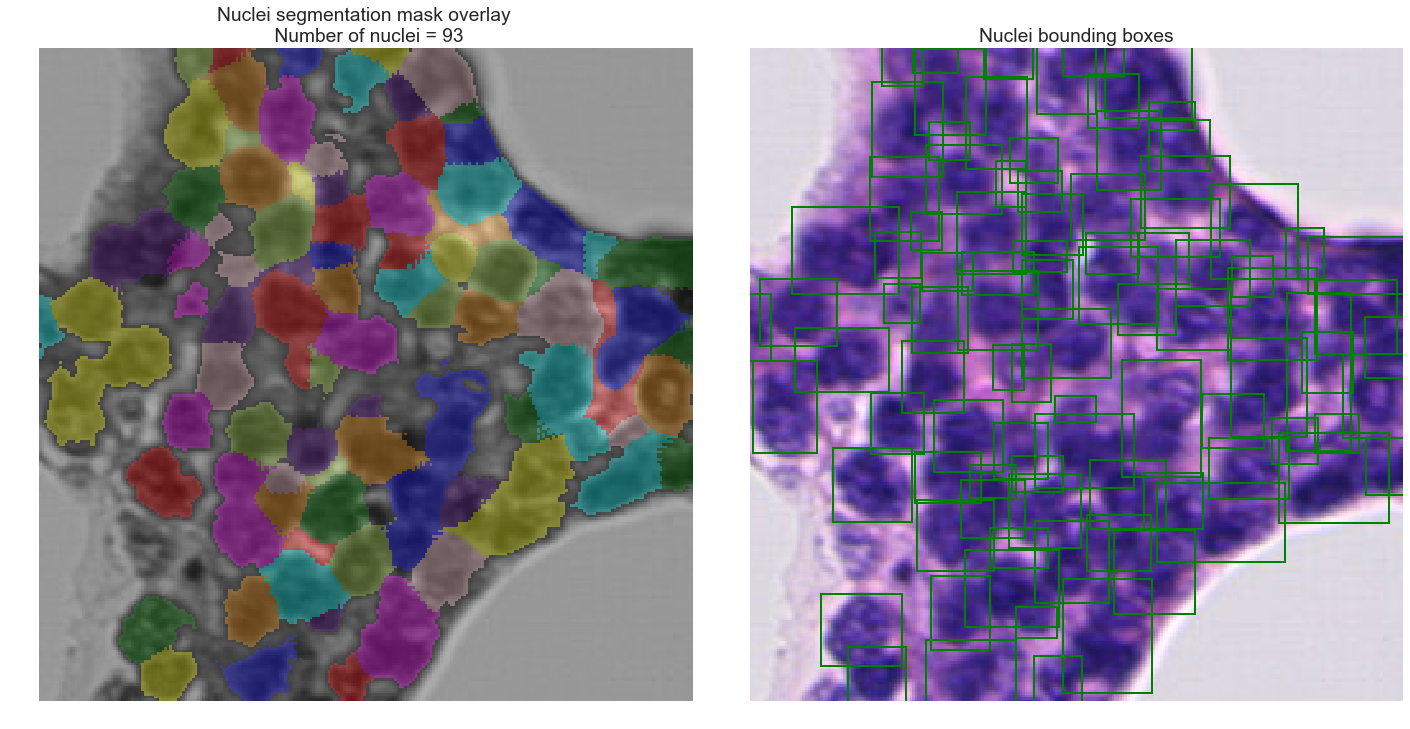

In [297]:
#index = tumor_called_as_normal[0]
index = tumor_called_as_normal[0]
sns.set_style('white')
img = joblib.load(validation_samples.iloc[index].img_path)
mask = joblib.load(validation_samples.iloc[index].mask_path)

_, _ = label_nuclei(img)
plt.savefig('presentation_images/rf_tumor_called_as_normal_{}.pdf'.format(index))


In [298]:
mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

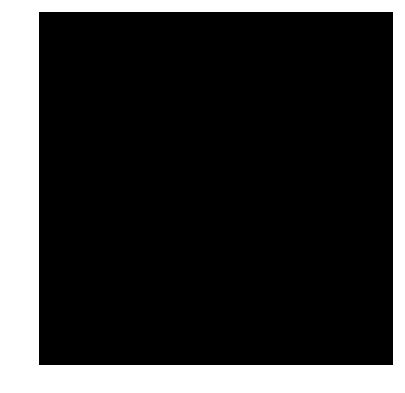

In [280]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
ax.imshow(mask, cmap='gray', vmin=0, vmax=1)
ax.axis('off')
fig.savefig('presentation_images/rf_tumor_called_as_normal_mask_{}.pdf'.format(index))

/home/saket/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/saket/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/saket/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/saket/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid alia

{'area': 209.69230769230768,
 'bbox_area': 401.0,
 'compactness': 24.84933308549888,
 'convex_area': 271.9384615384615,
 'eccentricity': 0.7736712043549906,
 'equivalent_diameter': 15.62710561893919,
 'extent': 0.5243047212343149,
 'fractal_dimension': 0.891056443074299,
 'inertia_tensor_eigvals_1': 33.58918010018228,
 'inertia_tensor_eigvals_2': 12.323779066317604,
 'major_axis_length': 22.412424221871518,
 'max_intensity': 0.859583563846318,
 'mean_intensity': 0.5970065061675954,
 'mean_intensity_entire_image': 0.753041709283567,
 'minor_axis_length': 13.289683308240537,
 'moments_central_1': 209.69230769230768,
 'moments_central_10': 697.0351764662414,
 'moments_central_11': 180140.9514372417,
 'moments_central_12': -64819.86475247354,
 'moments_central_13': -930.8960434185208,
 'moments_central_14': 27844.66739052332,
 'moments_central_15': -167565.432817521,
 'moments_central_16': 2798454.4570720177,
 'moments_central_2': -4.509213515400636e-16,
 'moments_central_3': 5525.14778370

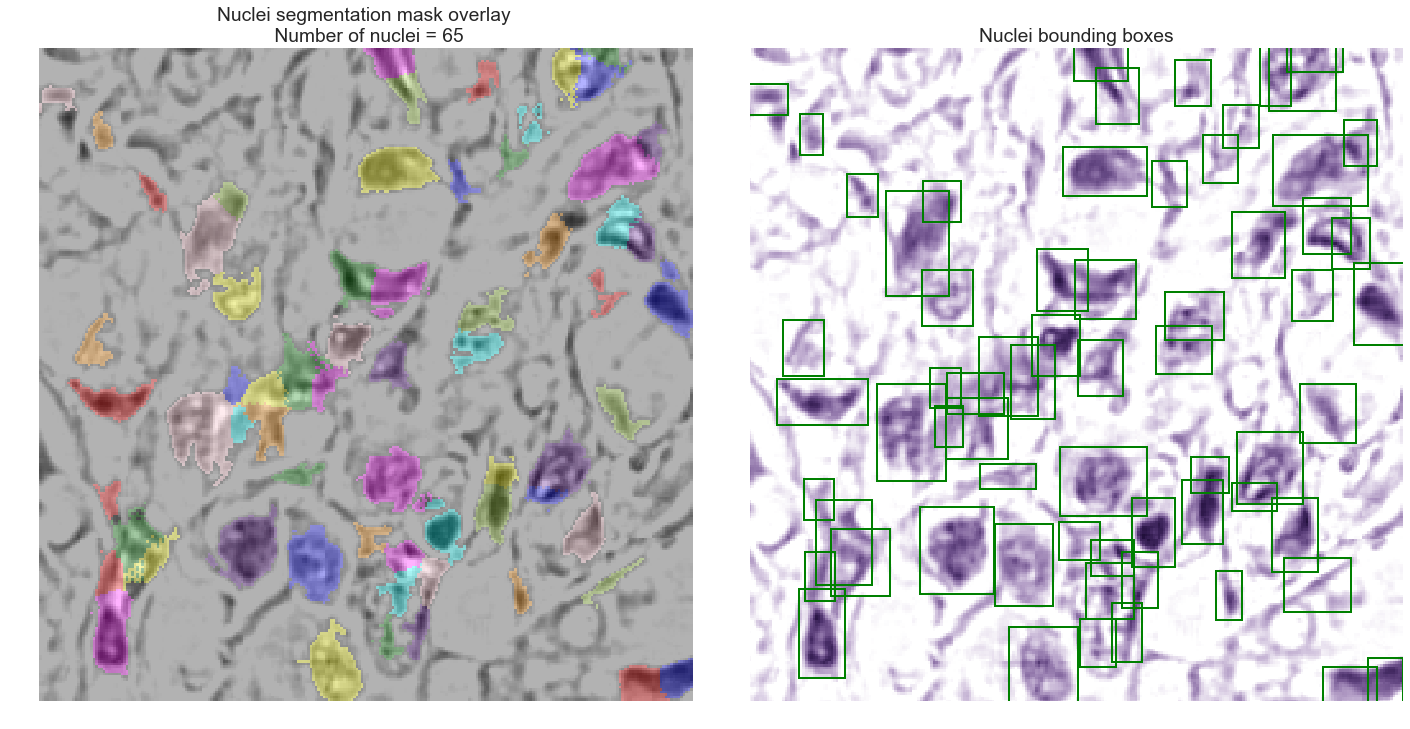

In [97]:
p,_ = label_nuclei(H_channel_v/255)
summarize_region_properties(p, image=img)

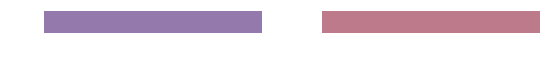

In [99]:
vahadane_fit.get_both_stains()

# Classify again!

In [129]:
def generate_rows(samples, num_samples, batch_size=1):
    while True:  # Loop forever so the generator never terminates
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples.iloc[offset:offset + batch_size]
            #is_tissue = batch_samples.is_tissue.tolist()
            #is_tumor = batch_samples.is_tumor.astype('int32').tolist()
            features = []
            labels = []
            #batch_samples = batch_samples.copy().drop(columns=['is_tissue', 'is_tumor'])
            for _, batch_sample in batch_samples.iterrows():
                row = batch_sample.values
                try:
                    label = int(batch_sample.is_tumor)
                except AttributeError:
                    # Should be normal
                    label = 0
                if batch_sample.is_tissue:
                    feature = pd.read_table(os.path.join('/Z/personal-folders/interns/saket/github/pyvirchow', batch_sample.segmented_tsv))

                    #feature = feature.drop(columns=['is_tumor', 'is_tissue'])
                    try:
                        feature = feature.loc[:, COLUMNS]
                        values = feature.loc[0].values
                        assert len(feature.columns) == 46
                    except KeyError:
                        # the segmentation returned empty columns!?
                        print(batch_sample.segmented_tsv)
                        #print(feature.columns)
                        #raise RuntimeError('Cannot parse the columns')
                        values = [0.0]*46
                    features.append(values)
                else:
                    values = [0.0]*46
                    features.append(values)
                labels.append(label)
            X_train = np.array(features, dtype=np.float32)
            y_train = np.array(labels)
            yield X_train,  y_train


In [130]:
import os
modelf = '/Z/personal-folders/interns/saket/github/pyvirchow/models/random_forest_all_train.tf.model.meta'
os.environ["CUDA_VISIBLE_DEVICES"] = ""
import tensorflow as tf
from tensorflow.contrib.tensor_forest.python import tensor_forest
from tensorflow.python.ops import resources
#os.makedirs(savedir, exist_ok=True)
num_classes=2
num_features=46
num_trees=100
max_nodes=10000
X = tf.placeholder(tf.float32, shape=[None, num_features])
# For random forest, labels must be integers (the class id)
Y = tf.placeholder(tf.int32, shape=[None])

# Random Forest Parameters
hparams = tensor_forest.ForestHParams(
    num_classes=num_classes,
    num_features=num_features,
    num_trees=num_trees,
    max_nodes=max_nodes).fill()

forest_graph = tensor_forest.RandomForestGraphs(hparams)
train_op = forest_graph.training_graph(X, Y)
loss_op = forest_graph.training_loss(X, Y)

# Measure the accuracy
infer_op, _, _ = forest_graph.inference_graph(X)
correct_prediction = tf.equal(tf.argmax(infer_op, 1), tf.cast(Y, tf.int64))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.Session()
saver = tf.train.import_meta_graph('{}'.format(modelf))
saver.restore(sess, tf.train.latest_checkpoint(os.path.dirname(modelf)))


INFO:tensorflow:Constructing forest with params = 
INFO:tensorflow:{'split_name': 'less_or_equal', 'base_random_seed': 0, 'stats_model_type': 0, 'initialize_average_splits': False, 'finish_type': 0, 'regression': False, 'num_trees': 100, 'num_classes': 2, 'split_finish_name': 'basic', 'split_after_samples': 250, 'num_features': 46, 'valid_leaf_threshold': 1, 'num_output_columns': 3, 'num_outputs': 1, 'model_name': 'all_dense', 'bagging_fraction': 1.0, 'bagged_features': None, 'checkpoint_stats': False, 'use_running_stats_method': False, 'param_file': None, 'max_nodes': 10000, 'pruning_type': 0, 'early_finish_check_every_samples': 0, 'collate_examples': False, 'feature_bagging_fraction': 1.0, 'split_type': 0, 'leaf_model_type': 0, 'inference_tree_paths': False, 'dominate_fraction': 0.99, 'num_splits_to_consider': 10, 'dominate_method': 'bootstrap', 'bagged_num_features': 46, 'max_fertile_nodes': 0, 'prune_every_samples': 0, 'split_pruning_name': 'none'}
INFO:tensorflow:Restoring paramet

In [140]:
tumor_called_as_normal_newpreds = []
for index in tqdm(tumor_called_as_normal):
    img = joblib.load(validation_samples.iloc[index].img_path)
    #mask = joblib.load(validation_samples.iloc[index].mask_path)

    vahadane_fit = VahadaneNormalization()
    vahadane_fit.fit(np.asarray(img).astype(np.uint8))

    H_channel_v = vahadane_fit.get_hematoxylin_channel(img)
    E_channel_v = vahadane_fit.get_eosin_channel(img)

    p, _ = label_nuclei(H_channel_v/255, draw=False)
    summary = summarize_region_properties(p, image=img)
    X_test =  [pd.DataFrame([summary]).loc[0].values]
    preds = sess.run(infer_op,
                     feed_dict={X: X_test})
    tumor_called_as_normal_newpreds.append(preds)

  1%|          | 18/3056 [02:00<5:40:17,  6.72s/it]

KeyboardInterrupt: 

In [ ]:
normal_called_as_tumor_newpreds = []
for index in tqdm(normal_called_as_tumor):
    img = joblib.load(validation_samples.iloc[index].img_path)
    #mask = joblib.load(validation_samples.iloc[index].mask_path)

    vahadane_fit = VahadaneNormalization()
    vahadane_fit.fit(np.asarray(img).astype(np.uint8))

    H_channel_v = vahadane_fit.get_hematoxylin_channel(img)
    E_channel_v = vahadane_fit.get_eosin_channel(img)

    p, _ = label_nuclei(H_channel_v/255, draw=False)
    summary = summarize_region_properties(p, image=img)
    X_test =  [pd.DataFrame([summary]).loc[0].values]
    preds = sess.run(infer_op,
                     feed_dict={X: X_test})
    normal_called_as_tumor_newpreds.append(preds)

(46,)